In [1]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing libraries for web scraping and data analysis
from selenium import webdriver  # For web scraping
from selenium.webdriver.chrome.options import Options  # Customizing Chrome options
from selenium.webdriver.common.by import By  # Locating elements on web pages

import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computing
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Statistical data visualization

import time  # Working with time-related tasks

## Scraping

This code snippet demonstrates web scraping using Selenium to extract financial data for the company TESLA (TSLA) from Yahoo Finance.
It initializes a Chrome driver with specified options, navigates to the TSLA stock page, and handles cookie consent if present.
The code then selects the "Profile" and "Financials" tabs to retrieve relevant information.

The code first retrieves the number of Full Time Employees from the "Profile" tab and prints it.

Moving to the "Financials" tab, the code extracts the Total Revenue for the years 2020, 2021, and 2022.
The revenue figures are converted to integer values and multiplied by 1000 to represent the actual revenue amounts.

Next, the code retrieves the Operating Income for the same years, following a similar approach as with Total Revenue.

Additionally, the code expands the "Selling General and Administrative Expense (SG&A)" section on the "Financials" tab.
It then retrieves the SG&A expenses for the years 2020, 2021, and 2022, using the same conversion and multiplication steps.

Each extracted value is printed, providing insights into the financial performance of TESLA.

Note: The code includes explicit time.sleep() statements to allow for appropriate delays during page loading and element retrieval.
Implicit waits are also applied to ensure sufficient time for elements to be found on the page.
These delays may need to be adjusted based on the website's loading speed and performance.


In [3]:
options = Options()
options.add_argument("--lang=en")

driver = webdriver.Chrome(options=options)
driver.get("https://finance.yahoo.com/quote/TSLA/")

time.sleep(2)
try:
    driver.find_element(By.ID, 'scroll-down-btn').click() #Go down button
    time.sleep(3)
except:
    driver.find_element(By.XPATH, '//*[@id="consent-page"]/div/div/div/form/div[2]/div[2]/button[1]').click() #Accept All button
    print("cookies are closed!")
    
driver.implicitly_wait(30) 

driver.find_element(By.XPATH, '//*[@id="quote-nav"]/ul/li[6]/a').click()
time.sleep(5)
print("Profile tab selected")

FTE = driver.find_element(By.XPATH, '//*[@id="Col1-0-Profile-Proxy"]/section/div[1]/div/div/p[2]/span[6]').text
FTE = int(FTE.replace(',', ''))
print("Full Time Employees: ",FTE) #Full Time Employees number
time.sleep(2)

driver.find_element(By.XPATH, '//*[@id="quote-nav"]/ul/li[7]/a').click()
time.sleep(5)
print("Financials tab selected")

# REVENUE
Tot_Rev_2020 = driver.find_element(By.XPATH, '//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[1]/div[1]/div[5]').text
Tot_Rev_2020 = int(Tot_Rev_2020.replace(',', '')) * 1000
print("Total Revenue in 2020: ", Tot_Rev_2020) #Total Revenue in 2020
time.sleep(2)

Tot_Rev_2021 = driver.find_element(By.XPATH, '//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[1]/div[1]/div[4]').text
Tot_Rev_2021 = int(Tot_Rev_2021.replace(',', ''))* 1000
print("Total Revenue in 2021: ", Tot_Rev_2021) #Total Revenue in 2021
time.sleep(2)

Tot_Rev_2022 = driver.find_element(By.XPATH, '//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[1]/div[1]/div[3]').text
Tot_Rev_2022 = int(Tot_Rev_2022.replace(',', ''))* 1000
print("Total Revenue in 2022: ", Tot_Rev_2022) #Total Revenue in 2022
time.sleep(2)


# OPERATING INCOME
Operating_Income_2020 = driver.find_element(By.XPATH, '//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[5]/div[1]/div[5]').text
Operating_Income_2020 = int(Operating_Income_2020.replace(',', ''))* 1000
print("Operating Income in 2020: ", Operating_Income_2020) #Operating Income in 2020
time.sleep(2)

Operating_Income_2021 = driver.find_element(By.XPATH, '//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[5]/div[1]/div[4]').text
Operating_Income_2021 = int(Operating_Income_2021.replace(',', ''))* 1000
print("Operating Income in 2021: ", Operating_Income_2021) #Operating Income in 2021
time.sleep(2)

Operating_Income_2022 = driver.find_element(By.XPATH, '//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[5]/div[1]/div[3]').text
Operating_Income_2022 = int(Operating_Income_2022.replace(',', ''))* 1000
print("Operating Income in 2022: ", Operating_Income_2022) #Operating Income in 2022
time.sleep(2)


driver.find_element(By.XPATH, '//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[4]/div[1]/div[1]/div[1]/button').click() #Clicking arrow button to make SG&A tab visible.
time.sleep(1)

# Selling General and Administrative Expense
SGA_2020 = driver.find_element(By.XPATH, '//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[4]/div[2]/div[1]/div[1]/div[5]').text
SGA_2020 = int(SGA_2020.replace(',', ''))* 1000
print("SG&A in 2020: ", SGA_2020) # SG&A Expense in 2020
time.sleep(2)

SGA_2021 = driver.find_element(By.XPATH, '//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[4]/div[2]/div[1]/div[1]/div[4]').text
SGA_2021 = int(SGA_2021.replace(',', ''))* 1000
print("SG&A in 2021: ", SGA_2021) # SG&A Expense in 2021
time.sleep(2)

SGA_2022 = driver.find_element(By.XPATH, '//*[@id="Col1-1-Financials-Proxy"]/section/div[3]/div[1]/div/div[2]/div[4]/div[2]/div[1]/div[1]/div[3]').text
SGA_2022 = int(SGA_2022.replace(',', ''))* 1000
print("SG&A in 2022: ", SGA_2022) # SG&A Expense in 2022
time.sleep(2)

cookies are closed!
Profile tab selected
Full Time Employees:  127855
Financials tab selected
Total Revenue in 2020:  31536000000
Total Revenue in 2021:  53823000000
Total Revenue in 2022:  81462000000
Operating Income in 2020:  1994000000
Operating Income in 2021:  6496000000
Operating Income in 2022:  13832000000
SG&A in 2020:  3145000000
SG&A in 2021:  4517000000
SG&A in 2022:  3946000000


## Dataframe

This code snippet creates a dictionary called data that holds the financial metrics for a company. The metrics include "Total Revenue," "Operating Income," "SG&A Expense," and "Employees #." The corresponding values for each metric are stored in lists under the respective years of 2022, 2021, and 2020.

After defining the data dictionary, the code uses it to create a pandas DataFrame called df. The DataFrame is constructed using the pd.DataFrame() function, which takes the data dictionary as input. Each list of values in the data dictionary becomes a column in the DataFrame, with the metrics as the index.

In [4]:
data = {'Metrics': ['Total Revenue', 'Operating Income', 'SG&A Expense', 'Employees #'],
        '2022': [Tot_Rev_2022, Operating_Income_2022, SGA_2022, FTE],
        '2021': [Tot_Rev_2021, Operating_Income_2021, SGA_2021, 0],
        '2020': [Tot_Rev_2020, Operating_Income_2020, SGA_2020, 0]}

df = pd.DataFrame(data)
df.set_index('Metrics', inplace=True)
df.head()

,2022,2021,2020
Metrics,,,
Total Revenue,81462000000,53823000000,31536000000
Operating Income,13832000000,6496000000,1994000000
SG&A Expense,3946000000,4517000000,3145000000
Employees #,127855,0,0


## Operating Margin

**Operating margin** is a financial metric that represents the percentage of a company's revenue that is left over after deducting the operating expenses. It is also known as operating income margin or EBIT margin (earnings before interest and taxes).

> Operating Margin = Operating Income / Total Revenue


In [5]:
Operating_Margin_2022 = '%.2f%%' % ((df.loc['Operating Income', '2022'] / df.loc['Total Revenue', '2022']) * 100)
Operating_Margin_2021 = '%.2f%%' % ((df.loc['Operating Income', '2021'] / df.loc['Total Revenue', '2021']) * 100)
Operating_Margin_2020 = '%.2f%%' % ((df.loc['Operating Income', '2020'] / df.loc['Total Revenue', '2020']) * 100)


print("Operating margin for the year of 2022 is", Operating_Margin_2022)
print("Operating margin for the year of 2021 is", Operating_Margin_2021)
print("Operating margin for the year of 2020 is", Operating_Margin_2020)

Operating margin for the year of 2022 is 16.98%
Operating margin for the year of 2021 is 12.07%
Operating margin for the year of 2020 is 6.32%


## 3-year Revenue Growth

**3-year revenue growth** is a financial metric that measures the percentage increase or decrease in a company's revenue over a three-year period. It is used to evaluate a company's growth trajectory and can provide insight into its ability to generate more revenue over time.

To calculate the 3-year revenue growth rate, you can use the following formula:

 > 3-Year Revenue Growth = ((Revenue in Current Year / Revenue in Previous Year)^1/3 - 1) * 100

In [6]:
growth_rate = ((df.loc['Total Revenue', '2022'] / df.loc['Total Revenue', '2020']) ** (1/2) - 1) * 100

print(f"The 3-year revenue growth rate from 2020 to 2022 is {growth_rate:.2f}%.")


The 3-year revenue growth rate from 2020 to 2022 is 60.72%.


## Revenue per employee

**revenue per total employee**, is a financial metric that measures the amount of revenue generated per employee in a company. It is calculated by dividing a company's total revenue by its total number of employees. This metric can help to evaluate a company's productivity and efficiency in generating revenue with its workforce.

> Revenue per Employee = Total Revenue / Total Number of Employees

To calculate the revenue per total employee for the 2022 year, we can use the Total Revenue and Employees # metrics from the dataframe and divide the Total Revenue by the number of Employees:

In [7]:
Revenue_per_Employee = df.loc['Total Revenue', '2022'] / df.loc['Employees #', '2022']

print("Therefore, generated approximately ${:.2f} in revenue per employee in 2022.".format(Revenue_per_Employee))


Therefore, generated approximately $637143.64 in revenue per employee in 2022.


## SG&A Margin

**SG&A margin** as a % of revenues is a financial metric that measures a company's selling, general, and administrative expenses (SG&A) as a percentage of its total revenue. SG&A expenses include costs such as salaries, advertising, and office supplies. A higher SG&A margin indicates that a company is spending more on these types of expenses relative to its revenue.

> SG&A Margin as a % of Revenues = (SG&A Expenses / Total Revenue) x 100

In [8]:
sga_margin_2022 = (df.loc['SG&A Expense', '2022'] / df.loc['Total Revenue', '2022']) * 100
sga_margin_2021 = (df.loc['SG&A Expense', '2021'] / df.loc['Total Revenue', '2021']) * 100
sga_margin_2020 = (df.loc['SG&A Expense', '2020'] / df.loc['Total Revenue', '2020']) * 100


print("The SG&A margin for 2022 is {:.2f}%".format(sga_margin_2022))
print("The SG&A margin for 2021 is {:.2f}%".format(sga_margin_2021))
print("The SG&A margin for 2020 is {:.2f}%".format(sga_margin_2020))

The SG&A margin for 2022 is 4.84%
The SG&A margin for 2021 is 8.39%
The SG&A margin for 2020 is 9.97%


According to Tesla's SG&A margin for 2022, selling, general, and administrative costs represent about 4.84% of the company's total revenue. Expenses connected to marketing, advertising, salaries, and other aspects of running a business on a daily basis are included in this regular expenditure for businesses.

Generally speaking, a smaller SG&A margin is preferable since it indicates that the company is able to keep costs in check and dedicate more of its revenue to other parts of the organization.

Overall, Tesla's SG&A margin of 4.84% appears respectable, especially in light of the company's rapid expansion and rising product demand.

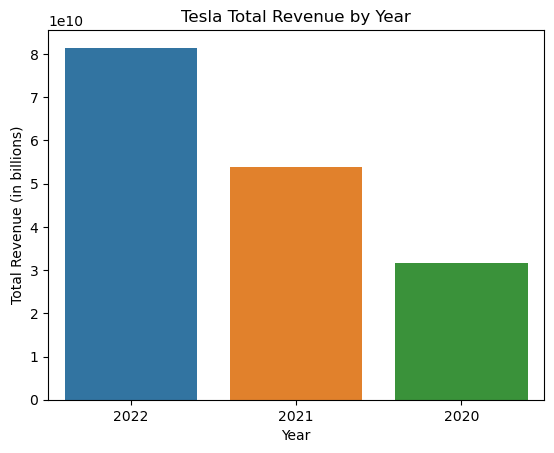

In [9]:
# create a bar chart of the total revenue for each year
sns.barplot(x=df.columns, y=df.loc['Total Revenue'])

# set the title and axis labels
plt.title('Tesla Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue (in billions)')

# show the chart
plt.show()